In [1]:
# 군집 분석 - 데이터의 특성에 따라 유사한 것끼리 묶음
# 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법

# 네이버 영화 리뷰 데이터
# 키워드 분석에는 네이버 영화 리뷰 데이터를 사용

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-white')

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

# 문자열 변환
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
    
    

C:\Users\user\AppData\Local\Temp\ipykernel_13268\3547695810.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# 데이터 전처리
# 형태소 분석기 Mecab으로 명사만 추출

from konlpy.tag import Mecab
tagger = Mecab(r'C:\mecab\mecab-ko-dic')

reviews = [tagger.morphs(x) for x in reviews]

In [3]:
print(reviews[:5])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.']]


In [4]:
# Word2Vec 생성
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as font_manager
from matplotlib import rc

In [5]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [6]:
word2vec.wv.most_similar('영화')

[('드라마', 0.6700440049171448),
 ('애니메이션', 0.6168009042739868),
 ('작품', 0.6024870276451111),
 ('애니', 0.5965243577957153),
 ('수작', 0.580418050289154),
 ('다큐', 0.565807580947876),
 ('독립영화', 0.5578662157058716),
 ('스릴러', 0.540169358253479),
 ('만화', 0.5307705402374268),
 ('명작', 0.5304458141326904)]

In [7]:
# t-sne을 이용한 단어 벡터 시각화
tsne = TSNE(n_components=2)

In [8]:
vocab = word2vec.wv.key_to_index.keys()

In [9]:
similarity = word2vec.wv[vocab]
similarity

array([[ 0.43150032, -0.2697373 , -0.08972986, ...,  0.01768199,
        -0.83312374, -0.13513272],
       [ 0.21800749,  0.13415743,  0.30079845, ...,  0.32723412,
         0.27511734,  0.8552505 ],
       [-0.0818721 , -0.36557811,  0.23481703, ...,  0.4599243 ,
         0.49889764,  0.32633778],
       ...,
       [-0.05047048,  0.08596171,  0.05954396, ..., -0.0072592 ,
         0.00801198, -0.01111874],
       [-0.03509266, -0.0515198 , -0.02579398, ..., -0.07083909,
         0.0731668 ,  0.08386888],
       [-0.08924771,  0.0655397 ,  0.02829581, ..., -0.04388216,
        -0.09655369,  0.10085834]], dtype=float32)

In [10]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[:10]

,x,y
.,57.852722,-22.367342
이,50.391411,8.771226
는,56.436840,0.271699
영화,25.413666,55.658676
다,-32.444382,38.824886
고,49.313702,38.828918
하,33.317066,-15.245236
도,42.252167,-31.691771
의,37.099785,-1.624559
가,38.189171,13.220076


C:\Users\user\AppData\Local\Temp\ipykernel_13268\4037057490.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


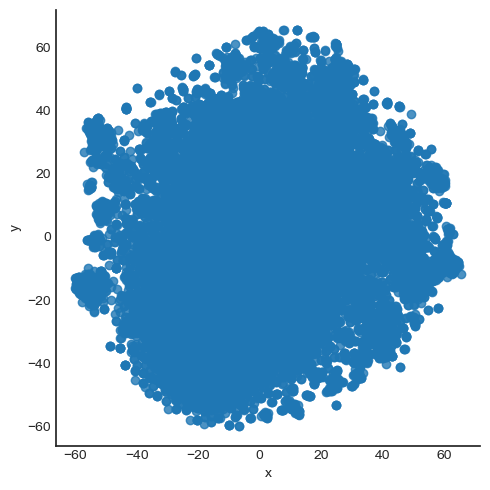

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot(x='x', y='y', data=df, fit_reg=False)
plt.show()

In [12]:
# Scikit-learn, Spicy를 이용한 계층적 군집화
# Scikit-learn ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)

from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict


array([2, 0, 2, ..., 4, 4, 3], dtype=int64)

In [13]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
.,57.852722,-22.367342,2
이,50.391411,8.771226,0
는,56.436840,0.271699,2
영화,25.413666,55.658676,0
다,-32.444382,38.824886,3
고,49.313702,38.828918,0
하,33.317066,-15.245236,2
도,42.252167,-31.691771,2
의,37.099785,-1.624559,2
가,38.189171,13.220076,0


<function matplotlib.pyplot.show(close=None, block=None)>

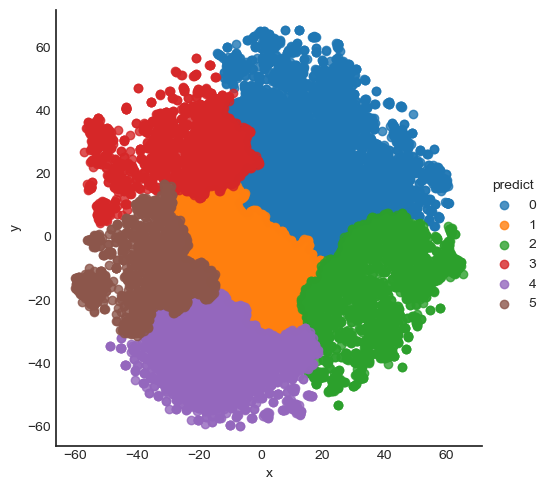

In [14]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict')
plt.show

In [15]:
# Scikit-learn average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
# average

avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 4], dtype=int64)

In [16]:
results['predict_avg'] = predict
results[:10]

,x,y,predict,predict_avg
.,57.852722,-22.367342,2,0
이,50.391411,8.771226,0,0
는,56.436840,0.271699,2,0
영화,25.413666,55.658676,0,4
다,-32.444382,38.824886,3,3
고,49.313702,38.828918,0,0
하,33.317066,-15.245236,2,0
도,42.252167,-31.691771,2,0
의,37.099785,-1.624559,2,0
가,38.189171,13.220076,0,1


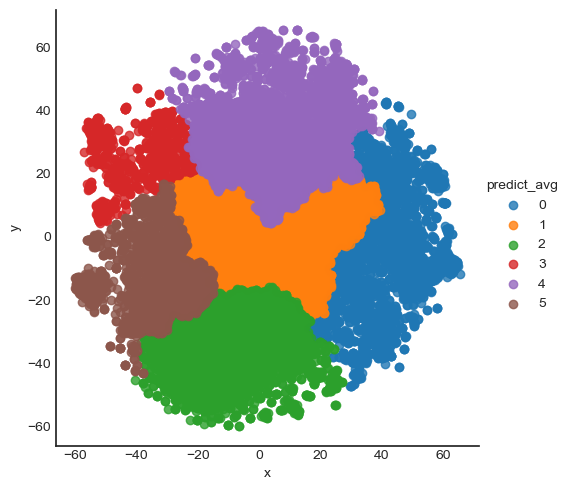

In [17]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict_avg')

In [18]:
# Scikit-learn complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침
# complete


compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([1, 4, 1, ..., 3, 3, 2], dtype=int64)

In [19]:
results['predict_compl'] = predict
results[:10]

,x,y,predict,predict_avg,predict_compl
.,57.852722,-22.367342,2,0,1
이,50.391411,8.771226,0,0,4
는,56.436840,0.271699,2,0,1
영화,25.413666,55.658676,0,4,2
다,-32.444382,38.824886,3,3,0
고,49.313702,38.828918,0,0,4
하,33.317066,-15.245236,2,0,1
도,42.252167,-31.691771,2,0,1
의,37.099785,-1.624559,2,0,1
가,38.189171,13.220076,0,1,4


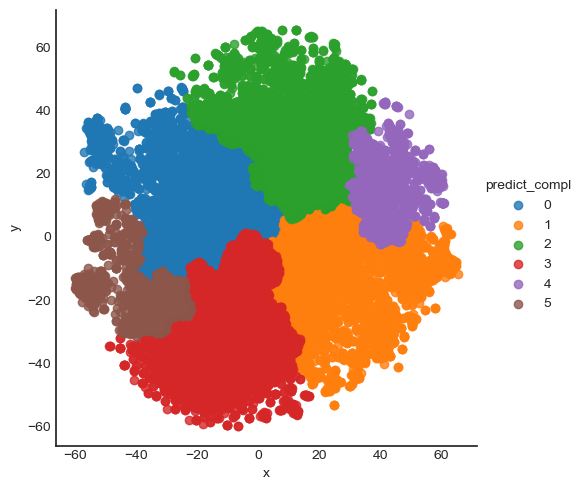

In [20]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict_compl')

In [23]:
# Scipy
# scipy를 이용한 거리 사용과 word2vec 사용을 비교

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

dismatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(dismatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,18972,18973,18974,18975,18976,18977,18978,18979,18980,18981
0,0.000000,32.222377,22.683274,84.624771,109.128620,61.894242,25.548440,18.174771,29.341906,40.830375,...,60.828854,77.377070,53.069615,90.575937,86.057131,60.514485,77.742995,79.270265,58.944700,87.363252
1,32.222377,0.000000,11.035813,53.313420,88.311896,30.077007,29.687097,41.430682,17.255135,13.026393,...,62.747303,85.148027,61.082633,94.137314,89.778593,67.339954,82.632319,81.871471,68.970410,65.713640
2,22.683274,11.035813,0.000000,63.648681,96.939258,39.375097,27.844196,34.969535,19.429810,22.685632,...,64.270222,85.225541,60.498799,95.708018,91.236324,67.337865,83.598534,83.558046,67.970478,74.417299
3,84.624771,53.313420,63.648681,0.000000,60.373257,29.571142,71.490059,89.076572,58.642429,44.466261,...,84.858308,108.021142,90.772012,109.354009,106.171264,93.684578,102.314157,98.636255,98.494098,44.314364
4,109.128620,88.311896,96.939258,60.373257,0.000000,81.965750,85.200623,102.777299,80.520486,75.324001,...,69.817836,84.264960,81.408445,76.601447,75.684663,79.201582,76.819277,71.200884,85.781854,22.737831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,60.514485,67.339954,67.337865,93.684578,79.201582,88.868006,39.632529,43.885121,50.436312,61.773034,...,10.225230,17.922558,7.467921,30.143310,25.647510,0.000000,17.260425,19.573323,6.607380,65.692277
18978,77.742995,82.632319,83.598534,102.314157,76.819277,101.559731,56.158924,61.041741,65.791440,75.609955,...,20.126316,7.485545,24.728186,12.902696,8.461204,17.260425,0.000000,5.793546,20.395124,68.007409
18979,79.270265,81.871471,83.558046,98.636255,71.200884,99.325752,56.597115,63.179559,65.201843,74.077017,...,19.520792,13.249752,26.826605,12.287521,8.058244,19.573323,5.793546,0.000000,24.031662,63.058253
18980,58.944700,68.970410,67.970478,98.494098,85.781854,92.072970,40.226389,41.545185,52.219722,64.541401,...,16.431729,18.504363,8.155747,33.074293,28.789436,6.607380,20.395124,24.031662,0.000000,71.956614


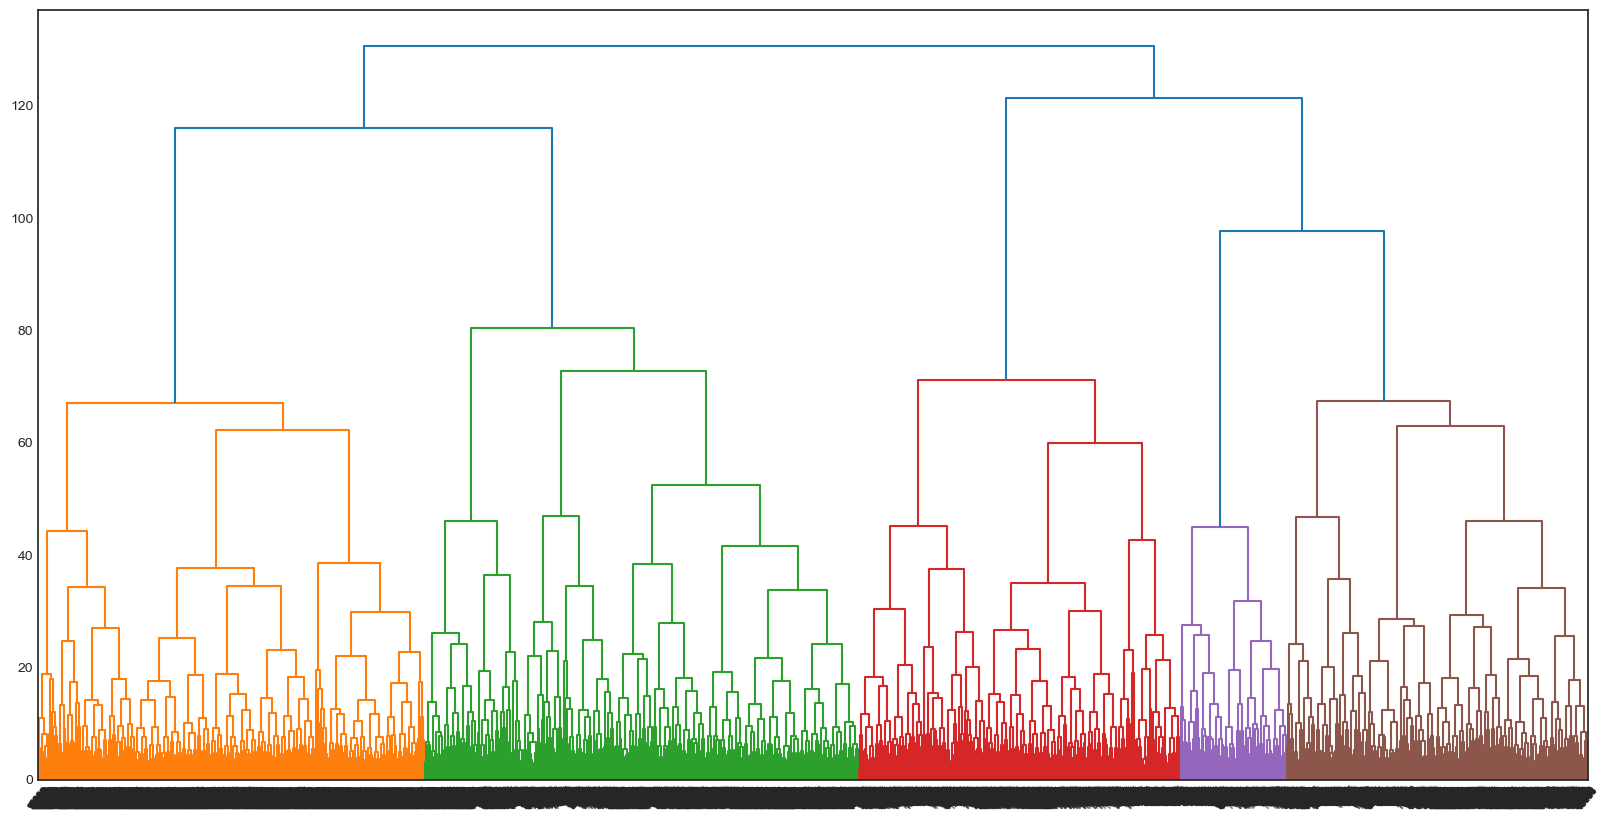

In [24]:
# 각 단어간 유클리디안 거리를 이용한 군집 분석 덴드로그램 시각화
row_clusters = linkage(dismatrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)

plt.show()

In [ ]:
# word2vec 을 이용한 군집분석 및 덴드로그램 시각화
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

In [25]:
# 클러스터 개수 3(kmeans)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 1])

In [28]:
results = df
results['predict_kmeans_3'] = predict
results[:10]

,x,y,predict,predict_avg,predict_compl,predict_kmeans,predict_kmeans_3
.,57.852722,-22.367342,2,0,1,2,2
이,50.391411,8.771226,0,0,4,2,2
는,56.436840,0.271699,2,0,1,2,2
영화,25.413666,55.658676,0,4,2,1,1
다,-32.444382,38.824886,3,3,0,1,1
고,49.313702,38.828918,0,0,4,2,2
하,33.317066,-15.245236,2,0,1,2,2
도,42.252167,-31.691771,2,0,1,2,2
의,37.099785,-1.624559,2,0,1,2,2
가,38.189171,13.220076,0,1,4,2,2


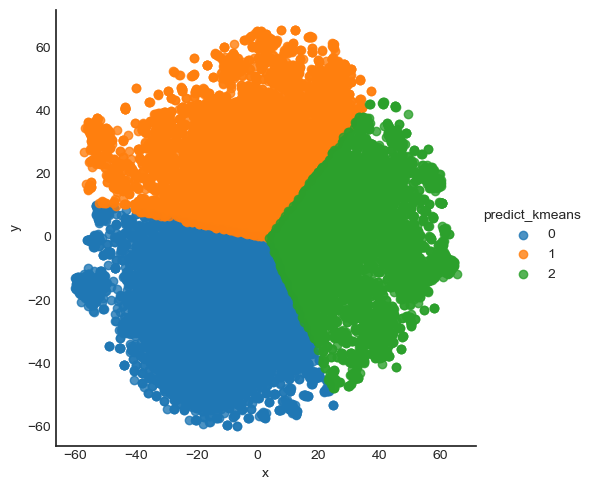

In [29]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict_kmeans')

In [36]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 5, 5, 1])

In [37]:
results = df
results['predict_kmeans_6'] = predict

results

,x,y,predict,predict_avg,predict_compl,predict_kmeans,predict_kmeans_3,predict_kmeans_6
.,57.852722,-22.367342,2,0,1,2,2,3
이,50.391411,8.771226,0,0,4,2,2,3
는,56.436840,0.271699,2,0,1,2,2,3
영화,25.413666,55.658676,0,4,2,1,1,1
다,-32.444382,38.824886,3,3,0,1,1,2
...,...,...,...,...,...,...,...,...
형부,-1.436197,-33.978844,4,2,3,0,0,5
스다,-18.489706,-36.643440,4,2,3,0,0,5
옥소리,-20.831396,-31.344227,4,2,3,0,0,5
재키,1.656914,-39.817520,4,2,3,0,0,5


<function matplotlib.pyplot.show(close=None, block=None)>

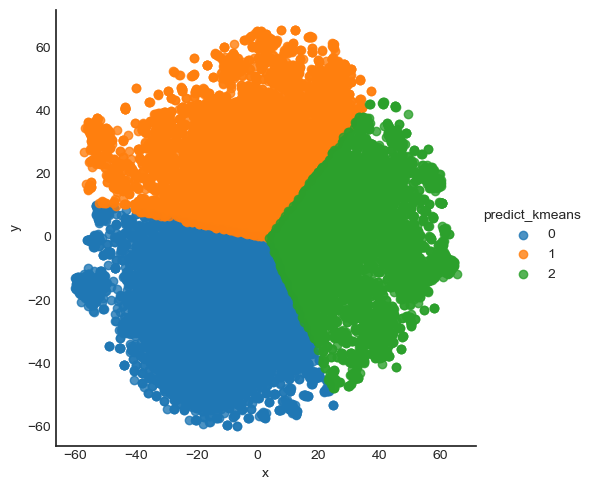

In [38]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict_kmeans')
plt.show